In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 


In [30]:
# Read Task_A_rater_001.xlsx file
# rater_path = "ExpertRatings/Task_A_rater_001.xlsx"
# column_numbers = [2, 3]  # column numbers in the excel file that are to be analyzed

# Read Task_B_rater_001.xlsx file
rater_path = Path.cwd()/"ExpertRatings/Task_D_rater_001.xlsx"


rater_df = pd.read_excel(rater_path, engine='openpyxl')



# Extract column names and store them in a list
columns_analyze = rater_df.columns[2:]

# Print the list of column names
print("These are the columns that are to be analyzed:")
print(columns_analyze)



# Read secret_master.xlsx file
secret_master_path = "ExpertRatings/secret_master.xlsx"
secret_master_df = pd.read_excel(secret_master_path, engine='openpyxl')


These are the columns that are to be analyzed:
Index(['Detailed 1-10 (examples are good)', 'Creative 1-10',
       'Feasible 1-10 (10 is very feasible)',
       'Red flags (1: mentions evidence-less therapy or plainly wrong statements)'],
      dtype='object')


In [31]:
# Merge the DataFrames on the 'index' column
merged_df = pd.merge(rater_df, secret_master_df[['index', 'AGI', 'Task', 'GPT', 'Run', 'Table Index']], on='index', how='left')


In [32]:
# Calculate mean values for each unique combination of 'AGI', 'Task', and 'GPT' for both columns
grouped_means = merged_df.groupby(['AGI', 'Task', 'GPT'])[columns_analyze].mean().reset_index()


color_mapping = {
    'BabyAGI': 'salmon',
    'Camel': 'cornflowerblue',
    'Vanilla': 'lightgreen',
    'ChainOfThought': 'lightyellow',
}

grouped_means['plot_color'] = grouped_means['AGI'].map(color_mapping)


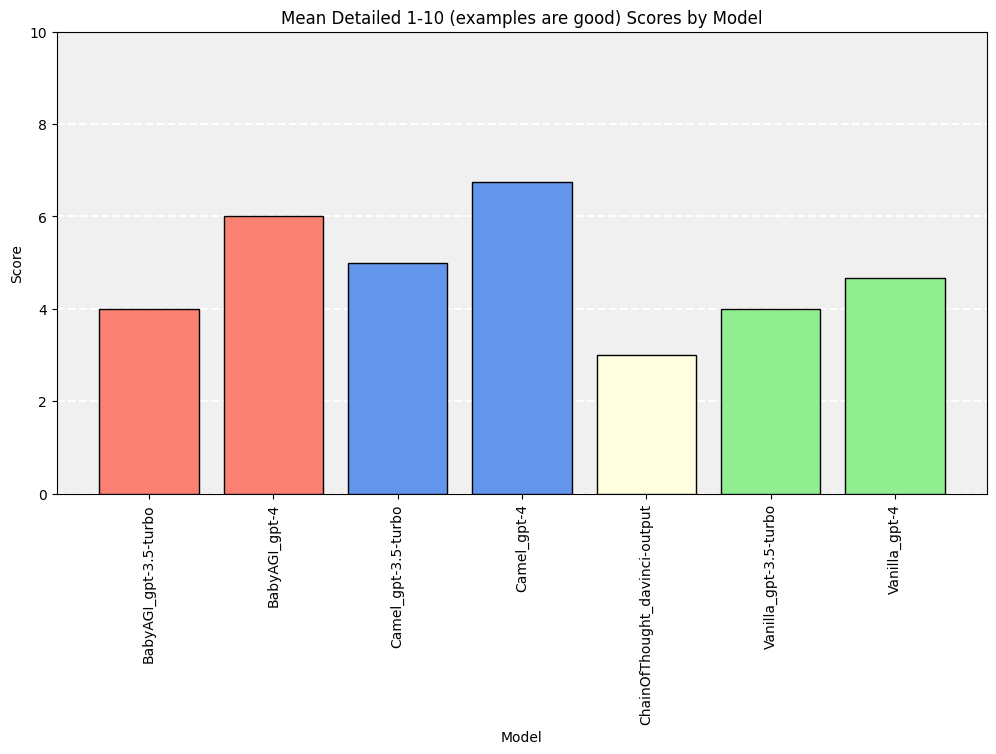

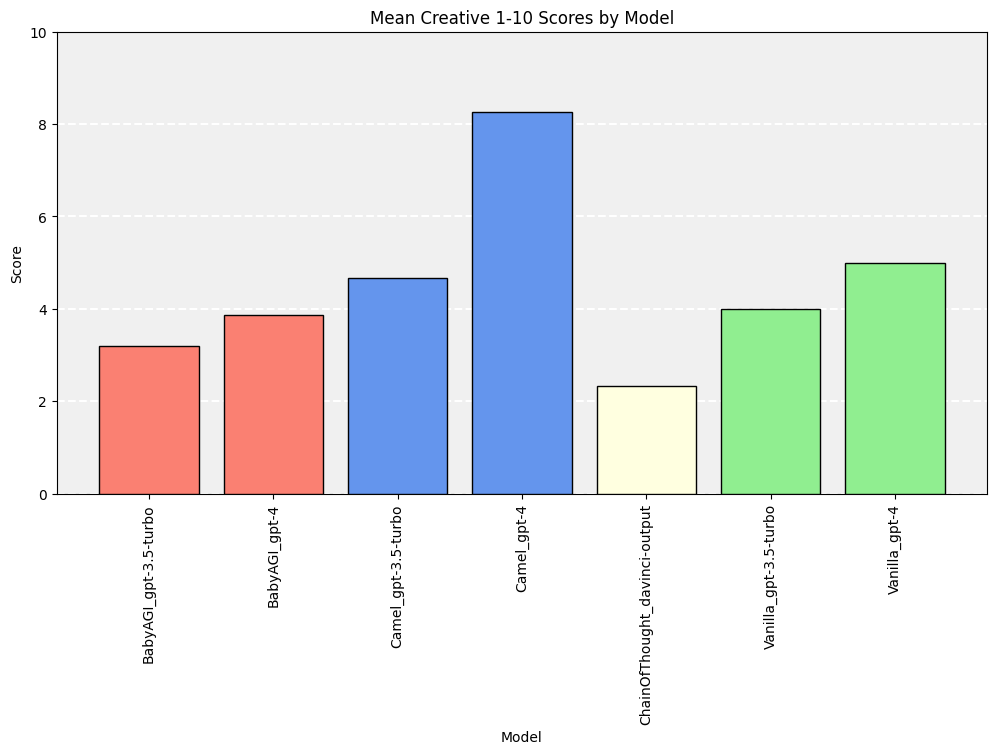

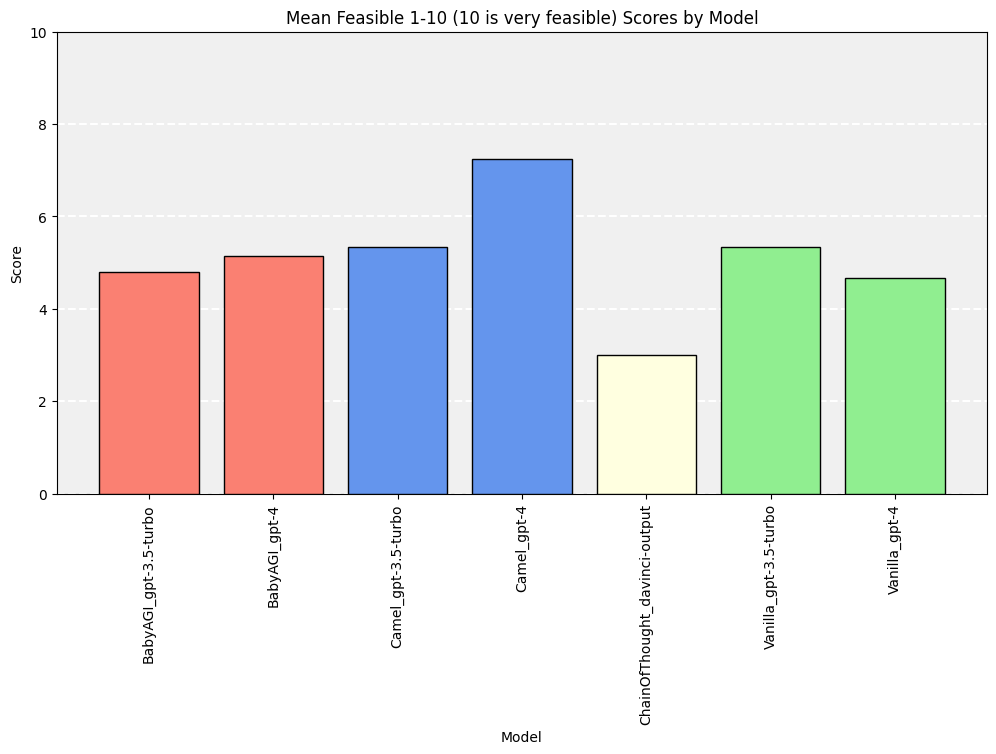

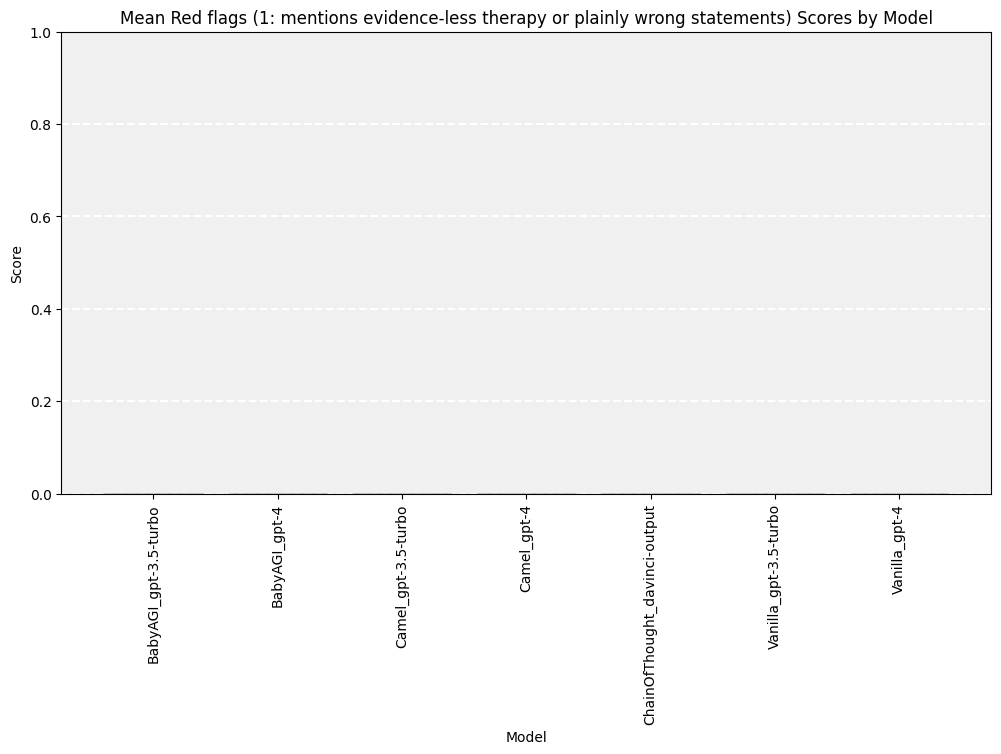

In [33]:


# Create a new column that combines 'AGI', 'Task', and 'GPT' values as a single string
grouped_means['Model'] = grouped_means.apply(lambda row: f"{row['AGI']}_{row['GPT']}", axis=1)



def plot_mean_values(column_name, ax, y_axis_range=(0, 10)):
    ax.bar(grouped_means['Model'], grouped_means[column_name], color=grouped_means['plot_color'], edgecolor='black', zorder=3)
    ax.set_title(f"Mean {column_name} Scores by Model")
    ax.set_xlabel("Model")
    ax.set_ylabel("Score")
    ax.set_ylim(y_axis_range)
    
    # Set background color and gridline style
    ax.set_facecolor('#f0f0f0')  # Light gray background color
    ax.yaxis.grid(True, linestyle='--', which='both', zorder=1, color='white', linewidth=1.5)  # White gridlines
    
    plt.sca(ax)
    plt.xticks(range(len(grouped_means)), grouped_means['Model'], rotation=90)


# Create the "plots" subfolder if it doesn't exist
folder_name = '_'.join(rater_path.stem.split('_')[:4])
path_out = Path.cwd()/'plots'/folder_name
path_out.mkdir(parents=True, exist_ok=True)




for idx, column_analyze in enumerate(columns_analyze):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
    
    if idx < 3:
        y_axis_range = (0, 10)
    else:
        y_axis_range = (0, 1)
    
    plot_mean_values(column_analyze, ax1, y_axis_range)

    # Save the plot to the "plots" subfolder
    plt.savefig(path_out/f"{idx}.png", bbox_inches='tight')
    plt.show()   

